<a href="https://colab.research.google.com/github/MoroF10/MoroF10/blob/main/Modelo_predituvo(churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
for colname in df.select_dtypes(["object"]):
    df[colname], _ = df[colname].factorize()

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

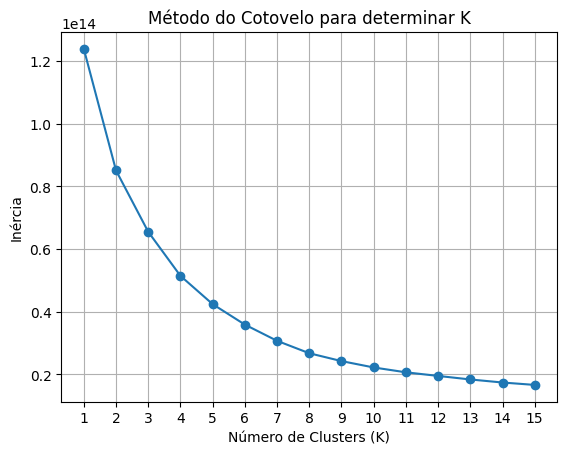

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Lista para armazenar os valores da inércia (soma dos quadrados das distâncias)
inertia_values = []

# Testar diferentes valores de K (de 1 a 10) e calcular a inércia
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, 16), inertia_values, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para determinar K')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

In [ ]:
# Executar o algoritmo de clustering (K-means)
val = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)

    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, labels)
    val[i] = silhouette_avg

val

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{2: 0.2864054300613896,
 3: 0.2954340229501047,
 4: 0.3172279150109327,
 5: 0.32477501643051326,
 6: 0.3220969427889642,
 7: 0.3313912811086548,
 8: 0.33355344879130244,
 9: 0.32940239523616355,
 10: 0.32047971778417894}

In [ ]:
kmeans = KMeans(n_clusters=6)
df["Cluster"] = kmeans.fit_predict(df)
df["Cluster"] = df["Cluster"].astype("int64")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Cluster          10000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.1 MB


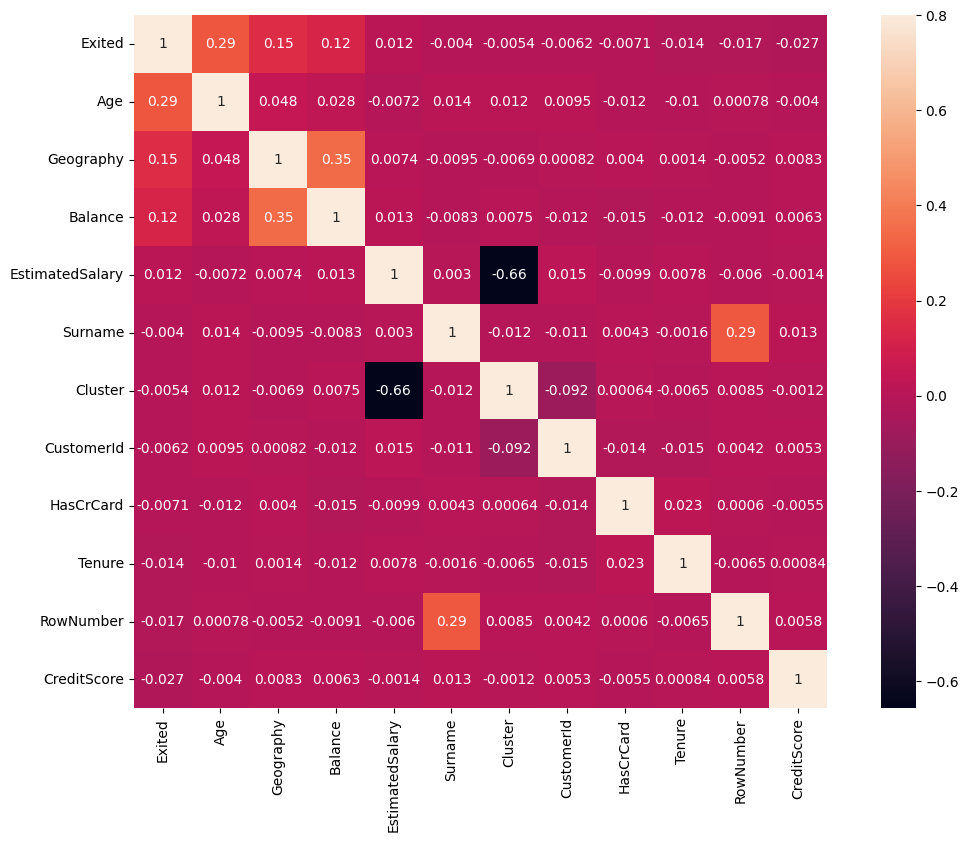

In [ ]:
k =12 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Exited')['Exited'].index
cm = np.corrcoef(df[cols].values.T)
corrmat = df[cols].corr()
ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [109]:
y = df.Exited
X = df.drop("Exited", 1)

<ipython-input-109-1fbd6280565e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Exited", 1)


In [110]:
X_t, X_v, y_t, y_v  = train_test_split(X,y, random_state = 1,)